## Import basic libraries

In [301]:
import pyarrow.feather as feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
from getFeatureNames import *

## Import Data

In [302]:
houses_df = feather.read_feather('data/dutchess_county_residence_sales_07_2019_06_2022.feather')

In [303]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7209 entries, 0 to 7208
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   address_street   7209 non-null   object        
 1   town             7209 non-null   category      
 2   parcel_id        7209 non-null   object        
 3   sale_date        7209 non-null   datetime64[ns]
 4   sale_price       7209 non-null   float64       
 5   building_style   7209 non-null   category      
 6   acreage          7209 non-null   float64       
 7   living_sqft      7209 non-null   float64       
 8   year_built       7209 non-null   int64         
 9   num_bedrooms     7209 non-null   int64         
 10  school_district  7209 non-null   category      
 11  central_air      7209 non-null   category      
 12  full_bathrooms   7209 non-null   int64         
 13  half_bathrooms   7209 non-null   int64         
 14  num_floors       7209 non-null   float64

In [763]:
numeric_features_int = ['year_built', 'num_bedrooms', 'full_bathrooms', 'half_bathrooms']
numeric_features_float = ['sale_price','acreage','living_sqft','num_floors', 'long', 'lat']

categorical_features = ['town','building_style', 'school_district', 'central_air', 'zip']
ordinal_features = ['grade','condition']

numeric_features_log = ['acreage','living_sqft']
numeric_features = ['year_built', 'num_bedrooms', 'full_bathrooms', 'half_bathrooms','num_floors']

feature_dictionary = {
    'log_and_scale': numeric_features_log,
    'scale': numeric_features,
    'one_hot': categorical_features,
    'ordinal': ordinal_features
}

In [306]:
#determine ordinal feature categories
for feature in ordinal_features:
    print(feature, houses_df[feature].cat.categories)

grade Index(['Average', 'Economy', 'Excellent', 'Good', 'Minimum'], dtype='object')
condition Index(['Excellent', 'Fair', 'Good', 'Normal', 'Poor'], dtype='object')


In [307]:
#order ordinal feature categories from 
grade_cats = ['Minimum', 'Economy', 'Average', 'Good', 'Excellent']
condition_cats = ['Poor', 'Normal', 'Fair', 'Good', 'Excellent']

In [448]:
houses_df.head()

,address_street,town,parcel_id,sale_date,sale_price,building_style,acreage,living_sqft,year_built,num_bedrooms,...,central_air,full_bathrooms,half_bathrooms,num_floors,grade,condition,zip,lat,long,inflated_price
0,16 Lavelle Rd,Amenia,7167-13-145335-0000,2022-03-01 11:20:46,165000.0,Old style,1.00,945.0,1935,3,...,No,1,0,1.7,Economy,Fair,12501,41.845640,-73.55693,179859.601737
1,7 Mountain View Rd,Amenia,7168-00-269071-0000,2022-02-24 13:05:54,392000.0,Raised ranch,1.92,1344.0,1991,3,...,Yes,2,0,1.0,Average,Normal,12501,41.865780,-73.55192,432389.401208
2,425 Leedsville Rd,Amenia,7267-00-407485-0000,2022-02-18 12:53:21,190000.0,Ranch,0.58,1560.0,1960,3,...,No,1,2,1.0,Average,Normal,12501,41.849375,-73.51019,209576.495483
3,350 Leedsville Rd,Amenia,7267-00-432304-0000,2022-02-18 12:51:49,260000.0,Log home,1.29,838.0,1989,2,...,No,1,0,1.5,Average,Normal,12501,41.844660,-73.50908,286788.888556
4,360 Bog Hollow Rd,Amenia,7264-00-244626-0000,2022-02-15 13:23:41,353000.0,Ranch,0.61,1300.0,2020,3,...,No,2,0,1.0,Average,Good,12592,41.771060,-73.51760,394127.768029


In [964]:
houses_df.tail()

,address_street,town,parcel_id,sale_date,sale_price,building_style,acreage,living_sqft,year_built,num_bedrooms,...,central_air,full_bathrooms,half_bathrooms,num_floors,grade,condition,zip,lat,long,inflated_price
7204,25 Clapp Ave,V. Wappingers Falls,6158-18-253139-0000,2019-11-27 14:52:40,225000.0,Duplex,0.08,2018.0,1860,4,...,No,2,0,2.0,Average,Normal,12590,41.595165,-73.921460,337365.204372
7205,E 20 Academy St,V. Wappingers Falls,6158-18-396106-0000,2019-10-28 12:34:09,269900.0,Old style,0.17,1248.0,1875,3,...,No,1,0,2.0,Average,Good,12590,41.589100,-73.945140,405776.687648
7206,S 20 Gilmore Blvd,V. Wappingers Falls,6158-80-458007-0000,2019-08-30 16:27:56,165000.0,Duplex,0.11,864.0,1956,2,...,No,1,0,2.0,Average,Good,12590,41.591410,-73.914090,249278.676449
7207,20 Prospect St,V. Wappingers Falls,6158-18-290189-0000,2019-07-30 16:46:50,337000.0,Raised ranch,0.39,2541.0,1966,6,...,Yes,2,0,1.0,Average,Normal,12590,41.596460,-73.920190,503860.158706
7208,S 56 Remsen Ave,V. Wappingers Falls,6158-18-403065-0000,2019-07-08 13:02:17,212000.0,Cape cod,0.17,1033.0,1885,3,...,No,1,1,1.5,Average,Normal,12590,40.672195,-73.708903,314931.634077


# Add inflated value

In [350]:
median_sales = pd.read_csv('data/median_sale_price.csv', encoding='utf-16', delimiter='\t')

date_cols = ['Period Begin','Period End']
for col in date_cols:
    median_sales[col] = pd.to_datetime(median_sales[col], infer_datetime_format=True)
median_sales['Median Sale Price'] = median_sales['Median Sale Price'].str.replace(',','').astype(float)
median_sales = median_sales[['Period Begin','Period End','Median Sale Price']].sort_values(by='Period Begin').reset_index(drop=True)


In [351]:
median_sales.head()

,Period Begin,Period End,Median Sale Price
0,2018-12-10,2019-01-06,256958.2
1,2018-12-17,2019-01-13,255733.2
2,2018-12-24,2019-01-20,255733.2
3,2018-12-31,2019-01-27,254367.5
4,2019-01-07,2019-02-03,253337.5


In [352]:
median_sales['Median Sale Price'] = (median_sales['Median Sale Price'].max() - median_sales['Median Sale Price']) / median_sales['Median Sale Price'].min() + 1

In [354]:
houses_df['inflated_price'] = np.nan

for index, row in houses_df.iterrows():
    sale_price = row.sale_price
    sale_date = row.sale_date.date()
    factor = median_sales['Median Sale Price'].iloc[(median_sales['Period Begin'].apply(lambda x: x.date()) - sale_date).abs().idxmin()]
    inflated_price = row.sale_price * factor
    houses_df.loc[index, 'inflated_price'] = inflated_price

In [355]:
houses_df.head()

,address_street,town,parcel_id,sale_date,sale_price,building_style,acreage,living_sqft,year_built,num_bedrooms,...,central_air,full_bathrooms,half_bathrooms,num_floors,grade,condition,zip,long,lat,inflated_price
0,16 Lavelle Rd,Amenia,7167-13-145335-0000,2022-03-01 11:20:46,165000.0,Old style,1.00,945.0,1935,3,...,No,1,0,1.7,Economy,Fair,12501,41.845640,-73.55693,179859.601737
1,7 Mountain View Rd,Amenia,7168-00-269071-0000,2022-02-24 13:05:54,392000.0,Raised ranch,1.92,1344.0,1991,3,...,Yes,2,0,1.0,Average,Normal,12501,41.865780,-73.55192,432389.401208
2,425 Leedsville Rd,Amenia,7267-00-407485-0000,2022-02-18 12:53:21,190000.0,Ranch,0.58,1560.0,1960,3,...,No,1,2,1.0,Average,Normal,12501,41.849375,-73.51019,209576.495483
3,350 Leedsville Rd,Amenia,7267-00-432304-0000,2022-02-18 12:51:49,260000.0,Log home,1.29,838.0,1989,2,...,No,1,0,1.5,Average,Normal,12501,41.844660,-73.50908,286788.888556
4,360 Bog Hollow Rd,Amenia,7264-00-244626-0000,2022-02-15 13:23:41,353000.0,Ranch,0.61,1300.0,2020,3,...,No,2,0,1.0,Average,Good,12592,41.771060,-73.51760,394127.768029


# EDA

In [309]:
houses_df.describe()

,sale_price,acreage,living_sqft,year_built,num_bedrooms,full_bathrooms,half_bathrooms,num_floors,long,lat
count,7.209000e+03,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000
mean,4.067378e+05,2.129678,1958.068803,1961.798030,3.240117,1.861839,0.502428,1.497711,41.663015,-73.860290
std,3.322417e+05,9.166412,823.242099,38.540871,0.776614,0.799763,0.543120,0.467731,0.398244,0.906409
min,2.000000e+04,0.010000,504.000000,1712.000000,0.000000,0.000000,0.000000,1.000000,29.921416,-118.066109
25%,2.750000e+05,0.300000,1376.000000,1950.000000,3.000000,1.000000,0.000000,1.000000,41.583220,-73.909865
50%,3.500000e+05,0.640000,1788.000000,1967.000000,3.000000,2.000000,0.000000,1.500000,41.653990,-73.862140
75%,4.500000e+05,1.500000,2337.000000,1987.000000,4.000000,2.000000,1.000000,2.000000,41.753070,-73.758100
max,1.032500e+07,353.820000,8124.000000,2022.000000,8.000000,8.000000,5.000000,3.000000,45.334579,-73.305958


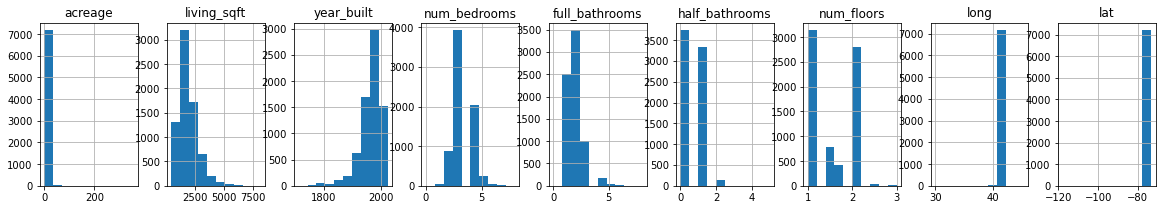

In [311]:
fig, axes = plt.subplots(ncols=9, figsize=(20,3))
houses_df[numeric_features_log+numeric_features].hist(ax=axes)
plt.show()

## Pair Plot

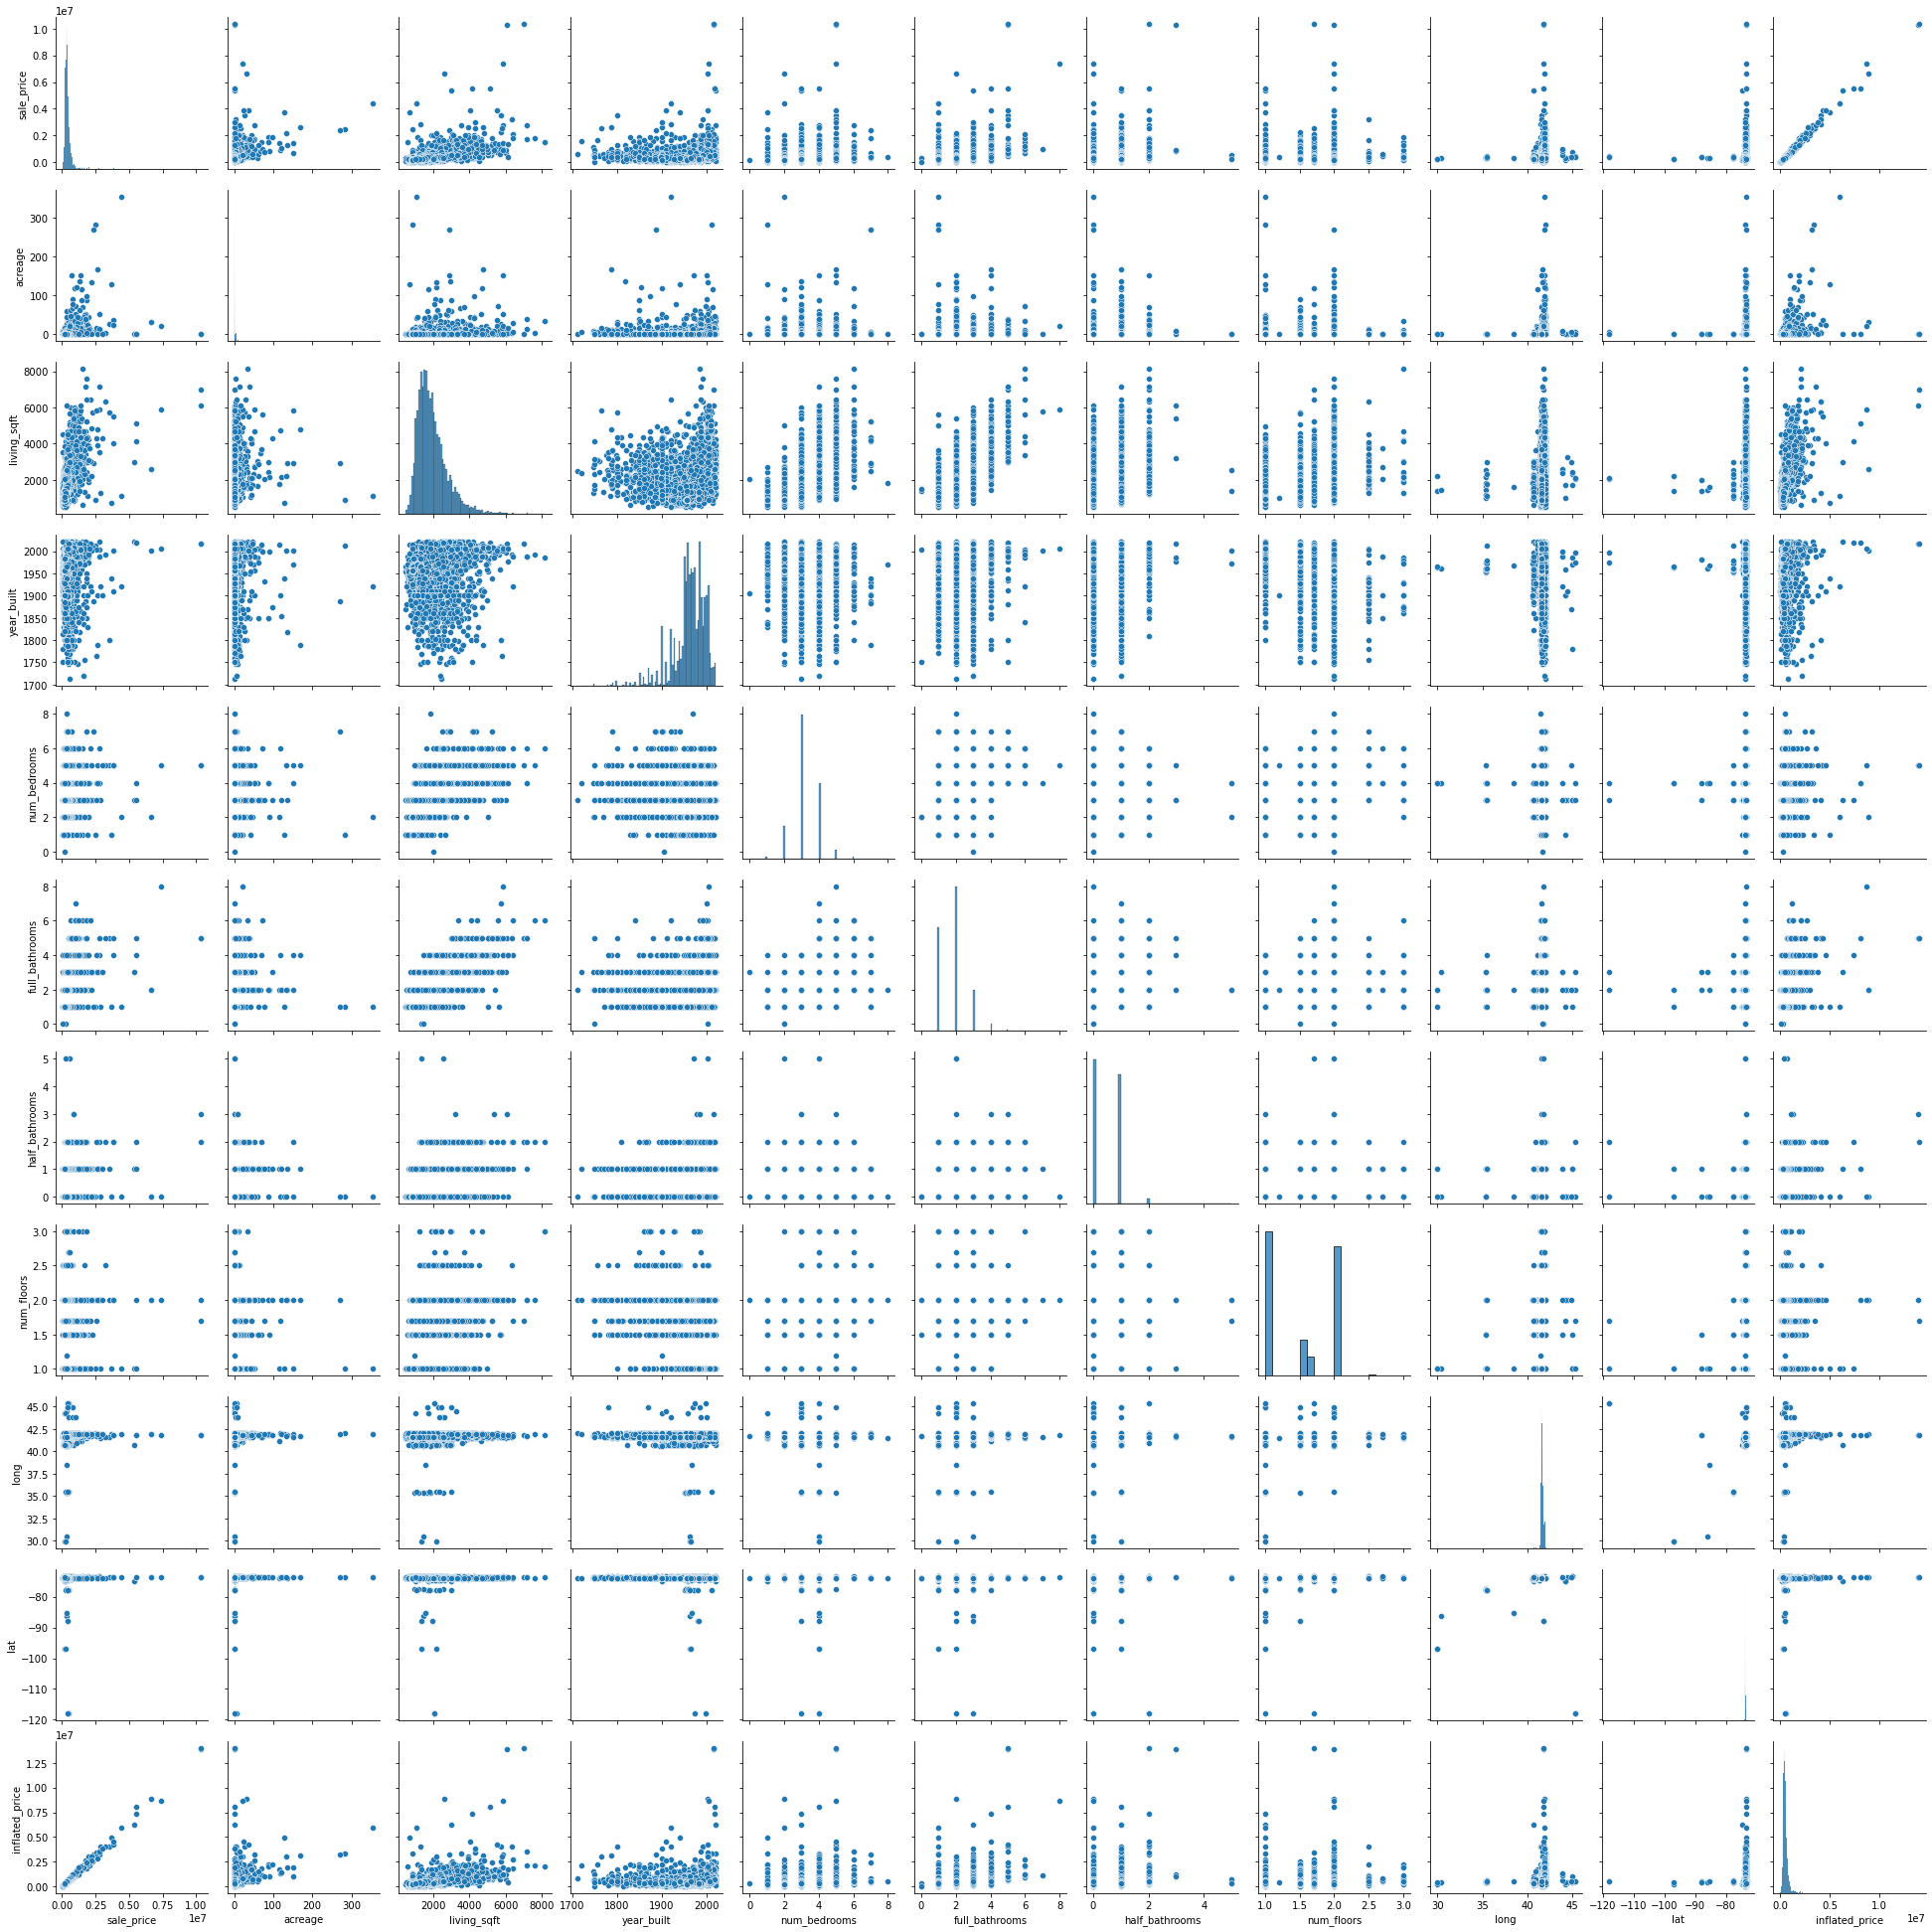

In [388]:
sns.pairplot(houses_df)
plt.show()

## Correlation Table

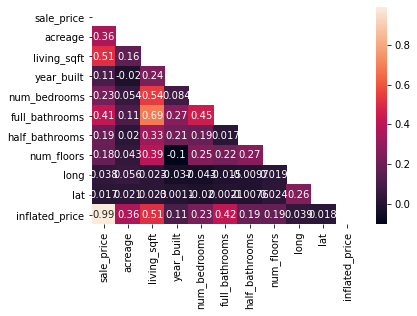

In [389]:
corr = houses_df.corr()

sns.heatmap(corr,annot=True, mask=np.triu(np.ones_like(corr)))
plt.show()

## Variance Inflation Factor

In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train[numeric_features].values, i) for i in range(X_train[numeric_features].shape[1])]
pd.Series(vif, index=X_train[numeric_features].columns)

KeyError: "['long', 'lat'] not in index"

# Test Train Split

In [889]:
from sklearn.model_selection import train_test_split

X = houses_df.drop(columns=['sale_price','address_street','parcel_id','sale_date','inflated_price'], axis=1)
y = np.log(houses_df['inflated_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Simple Baseline Model

Based on the correlation table, we will build our baseline model by using living_sqft as our main independent variable.

In [637]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

simple_X_train = X_train[['living_sqft']]
sm.OLS(endog=y_train, exog=sm.add_constant(simple_X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         inflated_price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     4462.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:22:41   Log-Likelihood:                -1544.3
No. Observations:                5046   AIC:                             3093.
Df Residuals:                    5044   BIC:                             3106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3203      0.012   1018.723      0.000      12.297      12.344
living_sqft     0.0004   5.73e-06     66.800      0.000       0.000       0.000
==============================================================================
Omnibus:                      855.038   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16738.855
Skew:                           0.171   Prob(JB):                         0.00
Kurtosis:                      11.916   Cond. No.                     5.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

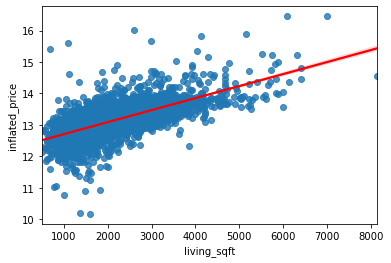

In [638]:
sns.regplot(x=simple_X_train, y=y_train, line_kws={'color': 'red'})
plt.show()

R-squared is .448. not good

# Initialize Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder

In [942]:

def log_transform(x):
    return np.log(x)

numeric_log_pipeline = Pipeline(steps=[
    ('log_trans', FunctionTransformer(log_transform)),
    ('scaler', StandardScaler())
])

numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one_hot', OneHotEncoder(sparse=False, drop='first'))
])

ordinal_pipeline = Pipeline(steps=[
    ('ordinal_enc', OrdinalEncoder(categories=[grade_cats, condition_cats]))
])

In [943]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('log_number', 'passthrough', numeric_features_log),
    ('number', 'passthrough', numeric_features),
    ('category', categorical_pipeline, categorical_features),
    ('ordinal', ordinal_pipeline, ordinal_features)
])

preprocessor

ColumnTransformer(transformers=[('log_number', 'passthrough',
                                 ['acreage', 'living_sqft']),
                                ('number', 'passthrough',
                                 ['year_built', 'num_bedrooms',
                                  'full_bathrooms', 'half_bathrooms',
                                  'num_floors']),
                                ('category',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['town', 'building_style', 'school_district',
                                  'central_air', 'zip']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['Minimum',
                                 

# Fit Multiple Linear Regression Model

In [953]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', linreg)
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('log_number',
                                                  Pipeline(steps=[('log_trans',
                                                                   FunctionTransformer(func=<function log_transform at 0x7fd2141d0c10>)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly_features',
                                                                   PolynomialFeatures())]),
                                                  ['acreage', 'living_sqft']),
                                                 ('number',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                              

In [954]:
def print_r2_MSE_coef(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    
    print(f"""
Training Data:
    R2 - {train_score}
    MSE - {train_mse}
Test Data:
    R2 - {test_score}
    MSE - {test_mse}
    """)
    

In [955]:
print_r2_and_MSE(model, X_train, y_train, X_test, y_test)


Training Data:
    R2 - 0.7227309519320807
    MSE - 0.05642764522999409
Test Data:
    R2 - 0.6463840123848735
    MSE - 0.06989014071047844
    


# Adding Polynomial Features

In [958]:
from sklearn.preprocessing import PolynomialFeatures

numeric_log_pipeline_wPoly = Pipeline(steps=[
    ('log_trans', FunctionTransformer(log_transform)),
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures())
])

numeric_pipeline_wPoly = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures())
])

preprocessor = ColumnTransformer(transformers=[
    ('log_number', numeric_log_pipeline_wPoly, numeric_features_log),
    ('number', numeric_pipeline_wPoly, numeric_features),
    ('category', categorical_pipeline, categorical_features),
    ('ordinal', ordinal_pipeline, ordinal_features)
])

linreg = LinearRegression()

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', linreg)
])

model.fit(X_train, y_train)

print_r2_and_MSE(model, X_train, y_train, X_test, y_test)



Training Data:
    R2 - 0.7227309519320807
    MSE - 0.05642764522999409
Test Data:
    R2 - 0.6463840123848735
    MSE - 0.06989014071047844
    


# Finding Interactions

In [960]:
from sklearn.base import TransformerMixin

class AddOneInteraction(TransformerMixin):
    def __init__(self, i, j):
        self.i = i
        self.j = j
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = np.copy(X)
        # change new_feature and right member according to your needs
        interaction = X_[:,self.i] * X_[:,self.j]
        X_ = np.concatenate([X_, interaction.reshape(-1,1)], axis=1)
        
        return X_

interactions = {}
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        if (i != j) and (frozenset((i,j)) not in interactions.keys()):
            interaction = AddOneInteraction(i,j)
            model = Pipeline(steps=[
                ('preprocess', preprocessor),
                ('interaction', interaction),
                ('model', linreg)
            ])

            model.fit(X_train, y_train)
            train_score = model.score(X_train, y_train)
            test_score = model.score(X_test, y_test)
            
            interactions[frozenset((i,j))] = (train_score, test_score, feature_names[i], feature_names[j],i,j)
    print(f'{i+1} / {len(feature_names)}', end='\r')

         

In [961]:
def sort_by_test(x):
    return x[1]

interactions_to_use = sorted(list(interactions.values()), key=sort_by_test, reverse=True)[:50]
interactions_to_use

[(0.7278354279575634, 0.6525403895526215, 'x0_Beekman', 'x0_Dover', 1, 3),
 (0.7229240693293961,
  0.6518578149406956,
  'x0_V. Millbrook',
  'x2_Spackenkill UFSD',
  21,
  53),
 (0.7229132419952953, 0.6518339191363858, 'x0_Tivoli', 'condition', 18, 89),
 (0.7268212094021752, 0.6516956696687992, 'x0_Dover', 'x1_Other style', 3, 37),
 (0.7231622853598973,
  0.650974187705958,
  'x0_V. Rhinebeck',
  'condition',
  23,
  89),
 (0.725898349908749,
  0.6508379425775934,
  'x0_Beekman',
  'x1_Other style',
  1,
  37),
 (0.7231295809347758, 0.6503814589548214, 'x0_Dover', 'x0_Stanford', 3, 17),
 (0.7237723470020913,
  0.6501554466417614,
  'x0_Union Vale',
  'x2_Dover Union Free SD',
  19,
  44),
 (0.7231518216489089,
  0.6500546959430323,
  'x0_Millerton',
  'x0_V. Millbrook',
  9,
  21),
 (0.7236132690621334, 0.6500496377178852, 'x0_Dover', 'x0_V. Fishkill', 3, 20),
 (0.7234121924379486,
  0.649995575961725,
  'x0_Stanford',
  'x1_Other style',
  17,
  37),
 (0.728668755229954,
  0.64988946

In [962]:
#make a list from the dictionary of interactions and take the last two values from each tuple (i, j)
list_of_ijs = [x[-2:] for x in interactions_to_use]

In [963]:
class AddMultInteraction(TransformerMixin):
    def __init__(self, list_of_ij_tuples):
        self.ijs = list_of_ijs
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = np.copy(X)
        # change new_feature and right member according to your needs
        for x in self.ijs:
            interaction = X_[:,x[0]] * X_[:,x[1]]
            X_ = np.concatenate([X_, interaction.reshape(-1,1)], axis=1)
        
        return X_

mult_interaction = AddMultInteraction(list_of_ijs)
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('interaction', mult_interaction),
    ('model', linreg)
])

model.fit(X_train, y_train)

print_r2_and_MSE(model, X_train, y_train, X_test, y_test)



Training Data:
    R2 - 0.756106073565417
    MSE - 0.049635399445053525
Test Data:
    R2 - 0.6705352727844556
    MSE - 0.06511678473456217
    


In [470]:
#print coefficients


# features = get_feature_names(preprocessor)
# features.extend([f'{x[1]}:{x[2]}' for x in interactions_to_use])
# coef = pd.DataFrame(model.named_steps['model'].coef_, columns=['coef'], index=features)
# for c in coef.iterrows():
#     print(c[0],c[1].values)

